<a href="https://colab.research.google.com/github/mikelalvarezbejarano/sis420/blob/main/pregunta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Alvarez Bejarano Mikel  Carrera: Ing. Sistemas

In [3]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from scipy.io import loadmat

In [7]:
data = loadmat(os.path.join('/content/drive/MyDrive/dataset/emnist-balanced.mat'))

In [8]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 20 07:38:25 2016', '__version__': '1.0', '__globals__': [], 'dataset': array([[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[45],
                       [36],
                       [43],
                       ...,
                       [23],
                       [31],
                       [ 8]], dtype=uint8), array([[ 493],
                       [1020],
                       [2358],
                       ...,
                       [ 515],
                       [ 137],
                       [3534]], dtype=uint16))                             ]],
              dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]

In [9]:
import scipy.io

In [10]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

In [12]:
# Cargar el archivo .mat desde el diccionario proporcionado
data = scipy.io.loadmat('/content/drive/MyDrive/dataset/emnist-balanced.mat')

In [13]:
# Obtener los datos de entrenamiento
train_data = data['dataset'][0, 0]['train']
X = train_data['images'][0, 0]
y = train_data['labels'][0, 0].ravel()

In [14]:
# Imprimir los datos de "x" y "y"
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[45 36 43 ... 23 31  8]


In [15]:
# def  featureNormalize(X):
#     X_norm = X.copy()
#     mu = np.zeros(X.shape[1])
#     sigma = np.zeros(X.shape[1])

#     mu = np.mean(X, axis = 0)
#     sigma = np.std(X, axis = 0)
#     X_norm = (X - mu) / sigma
    
#     return X_norm, mu, sigma

In [16]:
# # llama featureNormalize con los datos cargados
# X_norm, mu, sigma = featureNormalize(X)

# print(X)
# print('Media calculada:', mu)
# print('Desviación estandar calculada:', sigma)
# print(X_norm)

In [17]:
y[y == 10] = 0

m = y.size

In [18]:
print(np.unique(y))
print(m)

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
112800


In [19]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

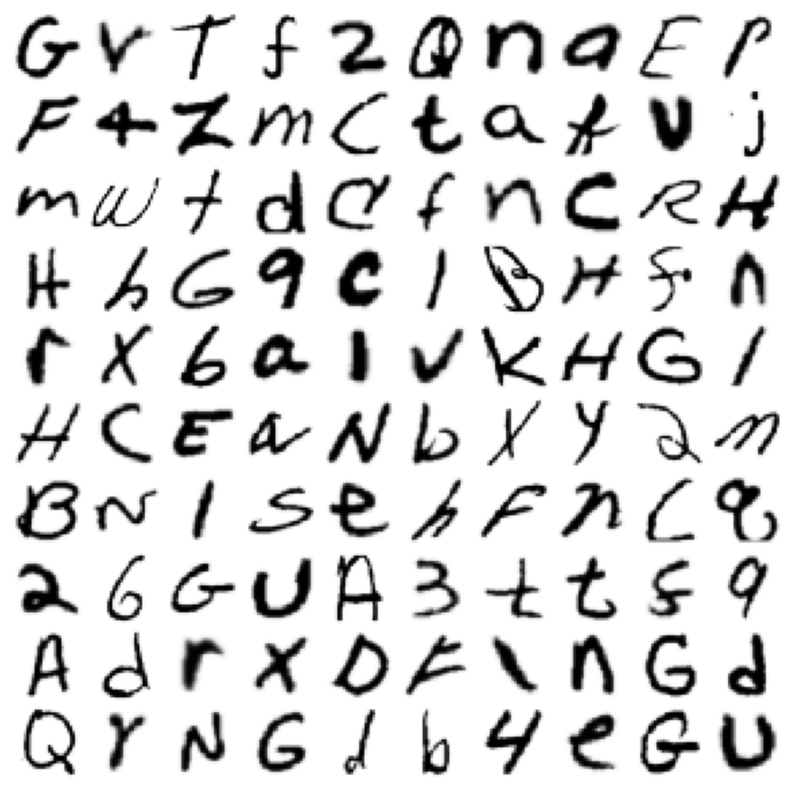

In [20]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [21]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [22]:
# def sigmoid(z):
#     # Aplicar la función sigmoide elemento por elemento
#     return 1.0 / (1.0 + np.exp(-z))

In [23]:
def sigmoid(z):
    # Aplicar el sigmoide truncado a z
    z = np.clip(z, -500, 500)  # Limitar los valores de z para evitar desbordamientos
    return 1.0 / (1.0 + np.exp(-z))

In [24]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y 
    el gradiente del costo w.r.t. a los parámetros.
    
    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas 
        incluida la intercepcion
        
    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de 
        caracteristicas (incluida la intercepcion).
    
    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos
    
    lambda_ : float
        Parametro de regularización. 
    
    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada. 
    
    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la 
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    #epsilon
    ep=1e-10

    # Inicializa algunos valores utiles
    m = y.size
    
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h+ep)) - (1 - y).dot(np.log(1 - h+ep))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [25]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [26]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 100}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

In [27]:
lambda_ = 0.2
all_theta = oneVsAll(X, y, num_labels, lambda_)

In [28]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas. 
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase. 
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1] 
    predice clases 0, 2, 0, 1 para 4 ejemplos).
    
    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is number of data points to predict, and n is number 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """
    
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(112800, 784)
Precision del conjuto de entrenamiento: 4.26%
(1, 784)
(1, 785)
[0]


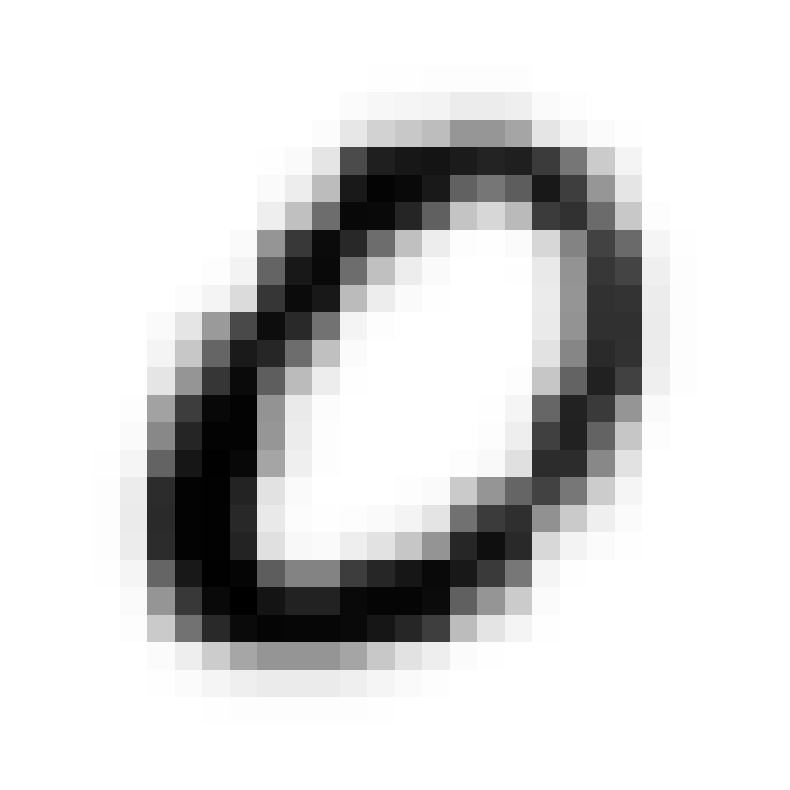

In [29]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[3000:3001, :].copy()
print(XPrueba.shape)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[4007:4008, :])